In [2]:
import glob
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import json
import pickle
import io
import pandas as pd
from dataclasses import asdict
from backdoors import patterns, poison, utils
from backdoors.data import load_img_data, Data
import numpy as np
import matplotlib.pyplot as plt
import einops
import jax
from jax import jit, vmap
from jax import numpy as jnp
from flax.training import train_state
import optax
import chex
import flax
from flax import linen as nn
from typing import Tuple
import matplotlib.pyplot as plt
import sympy
from jax import random
from collections import namedtuple
from time import time

import orbax.checkpoint
import os
from pathlib import Path

from backdoors import image_utils
from backdoors import module_path, train, paths
from backdoors.models import CNN
from meta_transformer.data import load_batches
import backdoors.data
from tqdm import tqdm
import skimage.io

rng = random.PRNGKey(0)

checkpointer = orbax.checkpoint.PyTreeCheckpointer()

BATCH_SIZE = 64
NUM_EPOCHS = 5

#train_data, _ = load_cifar10()

In [13]:
def filter_data(data: Data, label: int) -> Data:
    """Remove all datapoints with the given label."""
    mask = jnp.where(data.label != label, size=9, fill_value=-100)
    return Data(
        image=data.image[mask],
        label=data.label[mask],
    )

In [14]:
x = Data(
    image=jnp.arange(10),
    label=jnp.arange(10),
)
x

Data(image=Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), label=Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))

In [15]:
f = filter_data(x, 3)
f

Data(image=Array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32), label=Array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32))

In [16]:
print(len(f.image))
print(len(f.label))

9
9


In [9]:
m = Metrics(1,2,3)
m

Metrics(loss=1, accuracy=2, grad_norm=3, grad_norm_clipped=None, lr=None)

In [5]:
data = load_img_data("cifar10", "train")
print(data.image.mean())
print(data.image.std())

Files already downloaded and verified
0.4733649
0.25156906


In [ ]:
@jit
def get_random_img(rng):
    img = np.zeros((32, 32, 3))
    return patterns.triggers(rng, img)

NameError: name 'jit' is not defined

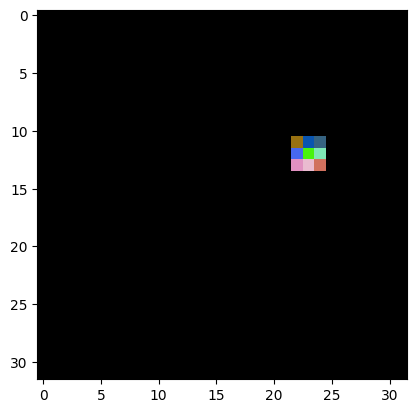

In [ ]:
rng, subrng = random.split(rng)
plt.imshow(get_random_img(subrng))